In [1]:
import time
import gym
import random
import numpy as np
from statistics import mean, median
from collections import Counter
from functools import reduce
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
env = gym.make('CartPole-v0')


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [3]:
def run_episode(env, parameters):  
    observation = env.reset()
    totalreward = 0
    for _ in range(200):
        action = 0 if np.matmul(parameters,observation) < 0 else 1
        observation, reward, done, info = env.step(action)
        totalreward += reward
        if done:
            break
    return totalreward

In [4]:
def hill_climbing():
    noise_scaling = 0.1  
    
    # Totalling episode * step tries
    for episode in range(1):
        parameters = np.random.rand(4) * 2 - 1  
        bestreward = 0  

        for step in range(10000):  
            newparams = parameters + (np.random.rand(4) * 2 - 1)*noise_scaling
            reward = run_episode(env,newparams)
            if reward > bestreward:
                bestreward = reward
                parameters = newparams
                if reward == 200:
                    break
    # return how often run_episode() was called                
    return (episode+1)*(step+1)

In [5]:
scores = []

for _ in tqdm(range(10000), mininterval=2, desc="evaluating method"):
    score = hill_climbing()
    scores.append(score)


evaluating method: 100%|██████████| 10000/10000 [2:03:47<00:00,  1.35it/s] 


mean 5445.9591 median 10000.0 max 10000 min 1


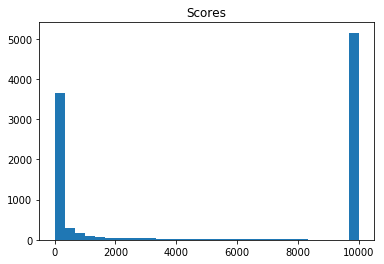

In [6]:
plt.hist(scores, bins=30)
plt.title('Scores')
print('mean', mean(scores), 'median', median(scores), 'max', np.max(scores), 'min', np.min(scores))

# Done
Hill climbing is pretty bad for this problem. Most runs get stuck in local minima and can't recover until max iterations is reached.